#Laboratorio Práctico: Procesamiento de Imágenes
**Tiempo estimado:** 50 minutos

**Objetivos:** Al finalizar este laboratorio, vas a poder aplicar conceptos fundamentales de manipulación, análisis y segmentación de imágenes utilizando las librerías `OpenCV` y `scikit-image`     

In [ ]:
# Importación de las librerías necesarias para el laboratorio
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import skimage as ski
from skimage import filters, feature, exposure
from PIL import Image

##Parte 0: Preparación del Entorno (5 minutos)

Primero, vamos a descargar las imágenes que vamos a usar en los ejercicios. Con estos comandos, las guardamos en el entorno de ejecución del notebook.

- `texto.png:` Una imagen con texto, ideal para el análisis de bordes.

- `paisaje.jpg:` Una imagen a color para la manipulación de canales.

- `monedas.jpg:` Una imagen de monedas sobre un fondo, perfecta para segmentación.

In [ ]:
# Descarga de las imágenes de trabajo
!wget -q https://upload.wikimedia.org/wikipedia/commons/3/3c/Aleppo_Codex_%28Deut%29.jpg -O texto.jpg
!wget -q https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg -O paisaje.jpg
!wget -q https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg -O monedas.jpg

print("Imágenes descargadas correctamente.")

Imágenes descargadas correctamente.


In [ ]:
# Función auxiliar que vamos a usar durante todo el laboratorio
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    """
    Función auxiliar para visualizar una o más imágenes en una misma fila.
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes] # Hacemos que sea iterable si es una sola imagen
    for ax, img, titulo in zip(axes, imagenes, titulos):
        # Usamos el mapa de color 'cmap' solo si la imagen es en escala de grises
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        ax.set_title(titulo)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

###Ejercicio 1: Análisis y Manipulación Básica (10 minutos)

Empezamos con lo fundamental: cargar una imagen y entender su estructura.

Tareas:

- Cargá la imagen `paisaje.jpg` usando OpenCV.

- Implementá una función que analice y muestre sus propiedades principales.

- Extraé y visualizá cada canal de color (Azul, Verde, Rojo) por separado.

- Convertí la imagen del formato BGR (propio de OpenCV) a RGB y comparala con la original.

Análisis de la imagen 'paisaje.jpg':
Dimensiones: (321, 481, 3)
Tipo de datos: uint8
Valor mínimo de intensidad: 0
Valor máximo de intensidad: 255
Cantidad total de píxeles: 463203


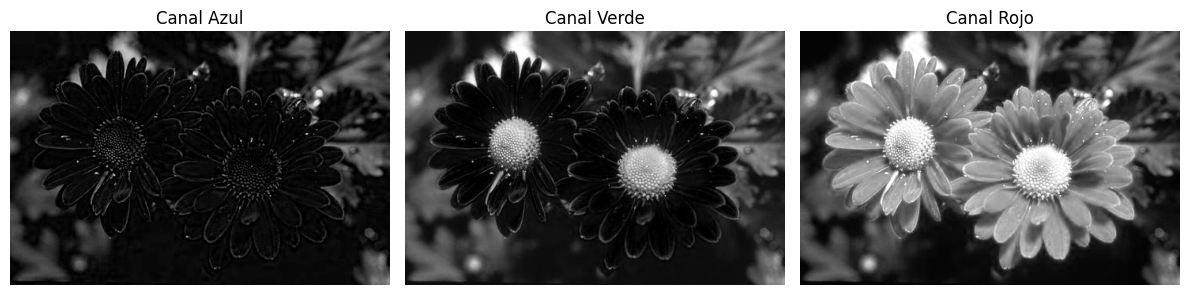

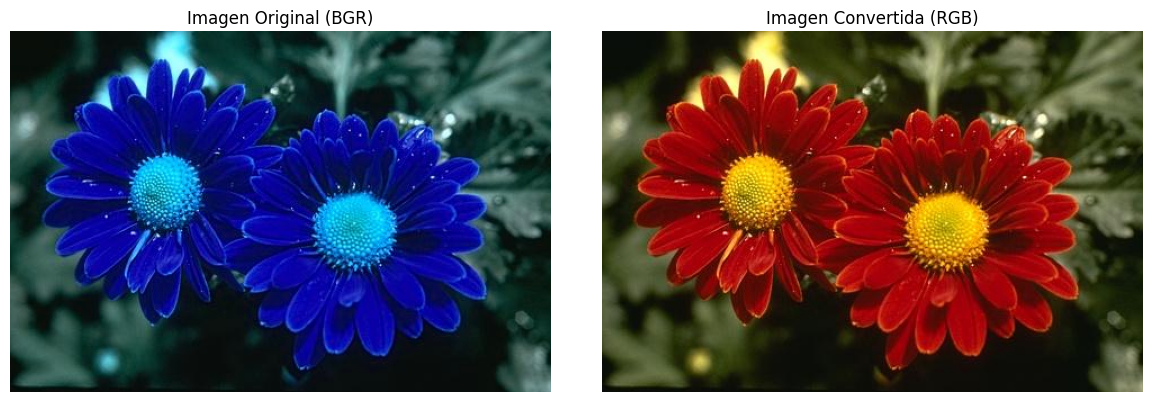

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 1
# --------------------------------------

# 1.1: Cargá la imagen 'paisaje.jpg'
img_paisaje = cv2.imread('paisaje.jpg')

# 1.2: Implementá esta función
def analizar_imagen(img):
    """
    Debe imprimir en consola:
    - Dimensiones (alto x ancho x canales)
    - Tipo de datos de los píxeles (ej: uint8)
    - Valores de intensidad mínimo y máximo
    - Cantidad total de píxeles
    """
    if img is None:
        print("Error: No se pudo cargar la imagen.")
        return

    print(f"Dimensiones: {img.shape}")
    print(f"Tipo de datos: {img.dtype}")
    print(f"Valor mínimo de intensidad: {img.min()}")
    print(f"Valor máximo de intensidad: {img.max()}")
    print(f"Cantidad total de píxeles: {img.size}")

# Llama a la función para analizar la imagen cargada
print("Análisis de la imagen 'paisaje.jpg':")
analizar_imagen(img_paisaje)


# 1.3: Extraé cada canal de color
# Recordá que OpenCV carga las imágenes en formato BGR
canal_b = img_paisaje[:,:,0]
canal_g = img_paisaje[:,:,1]
canal_r = img_paisaje[:,:,2]

# 1.4: Convertí la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img_paisaje, cv2.COLOR_BGR2RGB)

# Visualización sugerida (descomentar cuando tengas las variables):
mostrar_imagenes([canal_b, canal_g, canal_r],
                 ['Canal Azul', 'Canal Verde', 'Canal Rojo'])
mostrar_imagenes([img_paisaje, img_rgb],
                 ['Imagen Original (BGR)', 'Imagen Convertida (RGB)'])

In [ ]:
# --- Pregunta Conceptual ---
print("Pregunta Conceptual 1:")
print("¿Por qué la imagen se ve con colores extraños cuando se muestra")
print("directamente con matplotlib después de cargarla con OpenCV?")

Pregunta Conceptual 1:
¿Por qué la imagen se ve con colores extraños cuando se muestra
directamente con matplotlib después de cargarla con OpenCV?


In [ ]:
print("Tu respuesta: Es por la diferencia en el orden de color predeterminado. \nOpenCV carga imágenes en orden BGR (azul, verde, rojo). Matplotlib espera imágenes en orden RGB (rojo, verde, azul). \nCuando muestra una imagen BGR directamente con Matplotlib, interpreta el canal azul como rojo, el canal verde como verde y el canal rojo como azul,\nlo que da como resultado una apariencia de color inusual.\n")

Tu respuesta: Es por la diferencia en el orden de color predeterminado. 
OpenCV carga imágenes en orden BGR (azul, verde, rojo). Matplotlib espera imágenes en orden RGB (rojo, verde, azul). 
Cuando muestra una imagen BGR directamente con Matplotlib, interpreta el canal azul como rojo, el canal verde como verde y el canal rojo como azul,
lo que da como resultado una apariencia de color inusual.



### Ejercicio 2: Transformaciones Geométricas (10 minutos)

Ahora vamos a manipular la geometría de la imagen.

Tareas:

- Recortá una "región de interés" (ROI) de 100x100 píxeles de la imagen del paisaje.

- Redimensioná ese recorte para que mida 200x200 píxeles.

- Creá un mosaico de 2x2 utilizando el recorte redimensionado.

- (Opcional) Aplicá una rotación de 45 grados al recorte original.

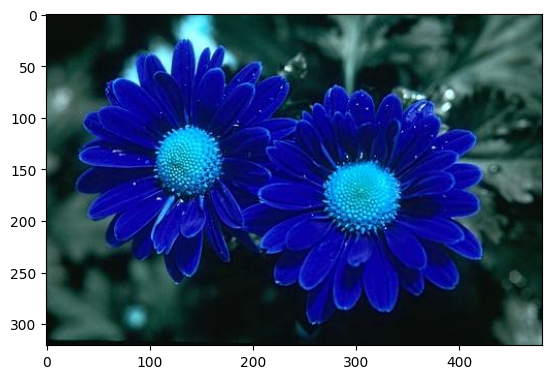

In [ ]:
plt.imshow(img_paisaje)

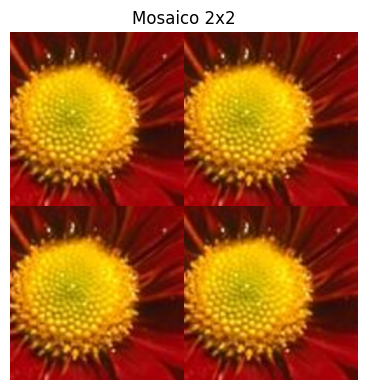

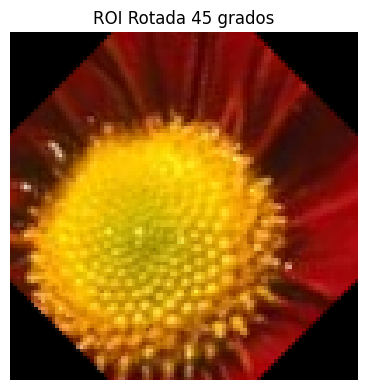

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 2
# --------------------------------------

# 2.1: Definí y extraé una región de interés (ROI)
# Definimos las coordenadas y dimensiones de la ROI (ejemplo: 100x100 píxeles)
x = 270  # Coordenada x del inicio
y = 125  # Coordenada y del inicio
w = 100 # Ancho de la ROI
h = 100 # Alto de la ROI

roi = img_rgb[y:y+h, x:x+w]

# 2.2: Redimensioná la ROI a 200x200
roi_grande = cv2.resize(roi, (200, 200))

# 2.3: Creá un mosaico 2x2
# Pista: usá np.vstack para apilar verticalmente y np.hstack para apilar horizontalmente.
fila1 = np.hstack([roi_grande, roi_grande])
fila2 = np.hstack([roi_grande, roi_grande])
mosaico = np.vstack([fila1, fila2])

# Visualiza el mosaico
mostrar_imagenes([mosaico], ['Mosaico 2x2'])


# 2.4: BONUS - Rotación
# Para rotar, necesitás una matriz de rotación y luego aplicar una transformación afín.
centro = (roi.shape[1] // 2, roi.shape[0] // 2)
angulo = 45
M = cv2.getRotationMatrix2D(centro, angulo, 1.0)
roi_rotado = cv2.warpAffine(roi, M, (roi.shape[1], roi.shape[0]))

# Visualiza la ROI rotada
mostrar_imagenes([roi_rotado], ['ROI Rotada 45 grados'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 2:")
print("¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?")
print("¿En qué casos prácticos usarías cada operación?")


Pregunta Conceptual 2:
¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?
¿En qué casos prácticos usarías cada operación?


Recortar (Crop):

* Selecciona una región rectangular de la imagen original y descarta todo lo que está fuera de esa región. La imagen resultante tiene menos píxeles que la original, pero mantiene la resolución de los píxeles dentro del área recortada.
* Propósito principal: Eliminar partes no deseadas de la imagen o enfocarse en una "región de interés" específica.

Redimensionar (Resize):

* Cambia las dimensiones (ancho y alto) de la imagen completa. Puede aumentar o disminuir el número total de píxeles. Cuando se redimensiona, se utilizan algoritmos de interpolación para calcular los valores de los nuevos píxeles. Esto puede afectar la calidad de la imagen, especialmente al aumentar el tamaño.
* Propósito principal: Ajustar el tamaño de la imagen para que se adapte a un espacio específico (por ejemplo, para mostrarla en una página web, para imprimirla en un tamaño particular, o para que cumpla con los requisitos de entrada de un modelo de machine learning).

En qué casos prácticos usaríamos cada operación:

Recortar (Crop):
* Eliminar bordes negros o no deseados de una foto.
* Enfocarse en la cara de una persona en un retrato.
* Extraer un objeto específico de un fondo para su posterior análisis.
* Preparar imágenes para entrenar modelos de detección de objetos (recortando las áreas que contienen los objetos).

Redimensionar (Resize):
* Crear miniaturas (thumbnails) de imágenes grandes.
* Ajustar el tamaño de las imágenes para subir a un sitio web y mejorar el tiempo de carga.
* Escalar imágenes a un tamaño estándar para su procesamiento en lote.
* Preparar imágenes para ser mostradas en dispositivos con diferentes resoluciones de pantalla.

### Ejercicio 3: Detección de Bordes (OpenCV vs. Scikit-image) (10 minutos)

En este ejercicio, vamos a comparar dos de los algoritmos más populares para la detección de bordes.

Tareas:

- Cargá la imagen `texto.png` y convertila a escala de grises.

- Aplicá el detector de bordes Canny con OpenCV. Experimentá con distintos umbrales.

- Aplicá el detector de bordes Sobel con scikit-image.

- Compará visualmente los resultados de ambos métodos.

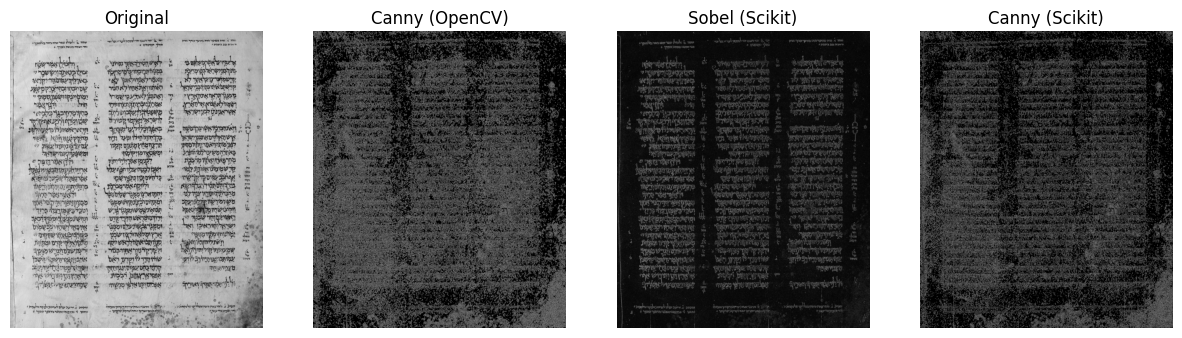

In [ ]:
# 3.1: Cargá 'texto.png' y convertila a escala de grises
img_texto = imread('texto.jpg')
# Se corrigió la función cv2.cvtColor para que use la imagen de entrada y el código de color correcto.
img_gray = cv2.cvtColor(img_texto, cv2.COLOR_BGR2GRAY)

# 3.2: Aplicá Canny con OpenCV
# Probá con diferentes umbrales, por ejemplo: (50, 150), (100, 200)
# cv2.Canny espera los umbrales como argumentos separados.
bordes_canny = cv2.Canny(img_gray, 50, 150)

# 3.3: Aplicá Sobel con scikit-image
# La función ski.filters.sobel necesita la imagen como argumento.
bordes_sobel = ski.filters.sobel(img_gray)

# 3.4: Para una mejor comparación, aplicá también Canny con scikit-image
# Nota: scikit-image espera que los valores de la imagen estén entre 0 y 1.
# Se agregó la imagen de entrada y se normalizó dividiendo por 255.0.
bordes_ski_canny = ski.feature.canny(img_gray / 255.0)

# Visualización sugerida:
# Para visualizar los resultados, puedes usar una función como esta:
def mostrar_imagenes(imagenes, titulos):
    plt.figure(figsize=(15, 5))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, len(imagenes), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

mostrar_imagenes([img_gray, bordes_canny, bordes_sobel, bordes_ski_canny],
                 ['Original', 'Canny (OpenCV)', 'Sobel (Scikit)', 'Canny (Scikit)'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 3:")
print("¿Qué diferencias fundamentales observás entre los resultados de Canny y Sobel?")
print("¿Cuándo preferirías usar uno sobre el otro?")


Pregunta Conceptual 3:
¿Qué diferencias fundamentales observás entre los resultados de Canny y Sobel?
¿Cuándo preferirías usar uno sobre el otro?


Canny vs. Sobel: Diferencias Fundamentales
* Canny es un algoritmo multifase, más complejo y robusto. No solo detecta bordes, sino que también los "limpia" de ruido y los hace más finos y conectados. Su resultado tiende a ser un mapa de bordes de un solo píxel de ancho (bordes finos y bien definidos). Canny es el "detector de bordes óptimo" en el sentido de que minimiza la tasa de falsos positivos y falsos negativos, y produce bordes bien localizados.

* Sobel es un operador más simple. Calcula el gradiente de intensidad de la imagen para encontrar los cambios bruscos, que corresponden a los bordes. Su salida no es un borde fino, sino una imagen donde los píxeles de alta intensidad (más blancos) indican la presencia de un borde. El resultado de Sobel suele ser un borde más grueso y ruidoso en comparación con Canny.

## Ejercicio 4: Segmentación de Monedas (10 minutos)

La segmentación consiste en dividir una imagen en regiones significativas. La umbralización (thresholding) es una de las técnicas más simples para lograrlo.

Tareas:

- Cargá `monedas.jpg` y convertila a escala de grises.

- Implementá tu propia función para segmentar por umbral.

- Probá la función con diferentes valores de umbral.

- Calculá el área segmentada (cantidad de píxeles blancos) para cada umbral.

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 4
# --------------------------------------

# 4.1: Cargá la imagen de monedas y pasala a escala de grises
# img_monedas = imread('monedas.jpg')
# monedas_gray = ...

# 4.2: Implementá esta función
def segmentar_umbral(imagen, umbral):
    """
    Segmenta una imagen usando un umbral fijo.
    - Los píxeles con valor > umbral se convierten en 255 (blanco).
    - Los píxeles con valor <= umbral se convierten en 0 (negro).

    Debe retornar la imagen segmentada y el área en píxeles (cantidad de píxeles blancos).
    Pista: podés usar np.where() o indexación booleana de NumPy.
    """
    # Tu código acá
    pass

# 4.3: Probá con diferentes umbrales y mostrá los resultados
# umbrales = [80, 120, 160]
# for t in umbrales:
#     segmentada, area = segmentar_umbral(monedas_gray, t)
#     print(f"Umbral {t}: área segmentada = {area} píxeles")
#     mostrar_imagenes([monedas_gray, segmentada], [f'Original', f'Umbral = {t}'])

Umbral 80: área segmentada = 62290 píxeles


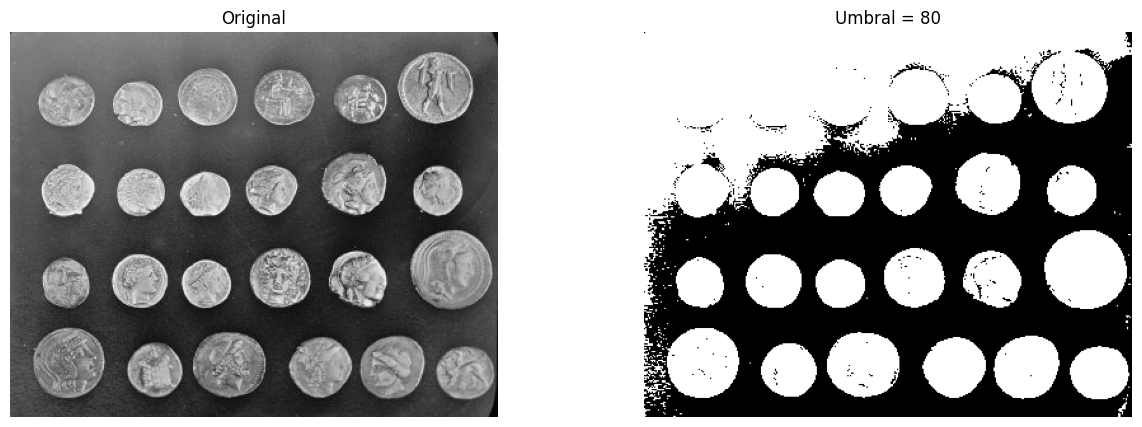

Umbral 120: área segmentada = 38336 píxeles


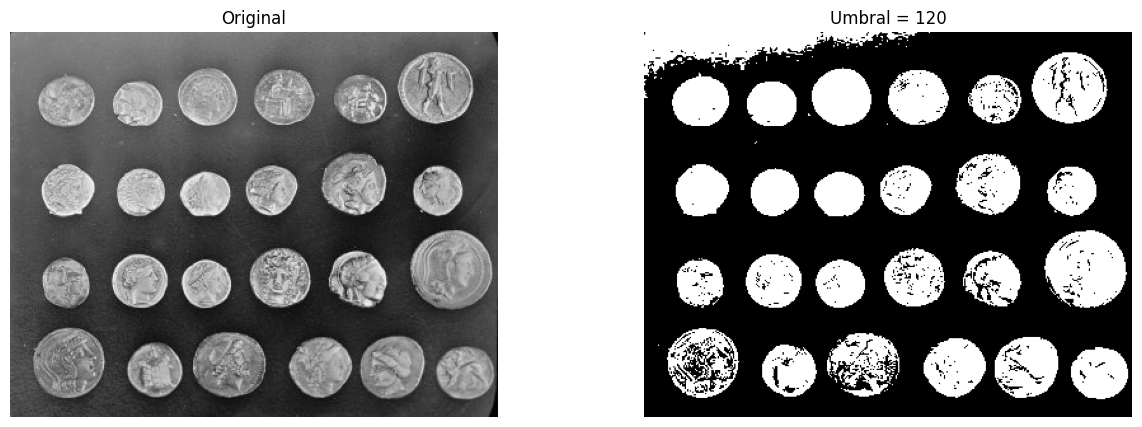

Umbral 160: área segmentada = 18993 píxeles


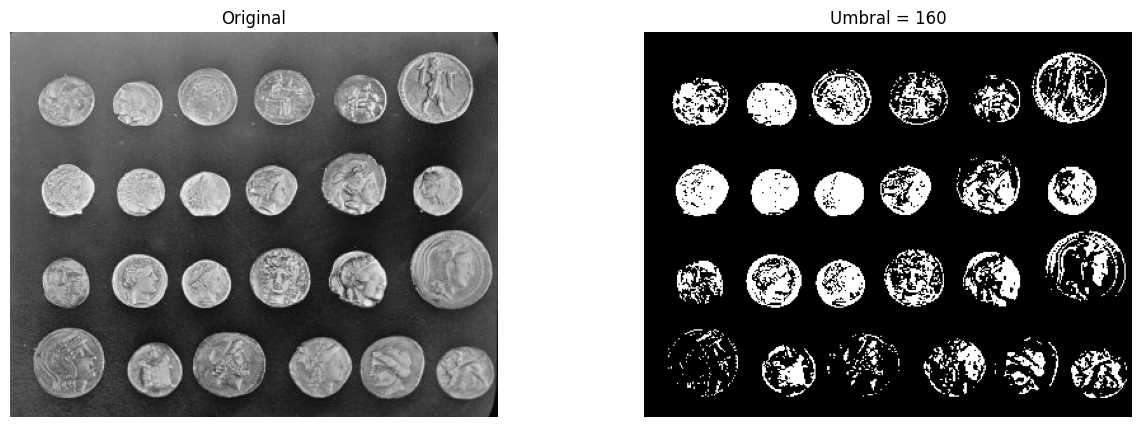

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 4
# --------------------------------------

# 4.1: Cargá la imagen de monedas y pasala a escala de grises
img_monedas = cv2.imread('monedas.jpg')
monedas_gray = cv2.cvtColor(img_monedas, cv2.COLOR_BGR2GRAY)

# 4.2: Implementá esta función
def segmentar_umbral(imagen, umbral):
    """
    Segmenta una imagen usando un umbral fijo.
    - Los píxeles con valor > umbral se convierten en 255 (blanco).
    - Los píxeles con valor <= umbral se convierten en 0 (negro).

    Debe retornar la imagen segmentada y el área en píxeles (cantidad de píxeles blancos).
    """
    # Usando indexación booleana de NumPy para una segmentación eficiente
    img_segmentada = np.zeros_like(imagen)
    img_segmentada[imagen > umbral] = 255

    # Otra forma de hacerlo, usando np.where()
    # img_segmentada = np.where(imagen > umbral, 255, 0)

    # Calculamos el área contando los píxeles blancos (valor 255)
    area = np.sum(img_segmentada == 255)

    return img_segmentada, area

# 4.3: Probá con diferentes umbrales y mostrá los resultados
umbrales = [80, 120, 160]
for t in umbrales:
    segmentada, area = segmentar_umbral(monedas_gray, t)
    print(f"Umbral {t}: área segmentada = {area} píxeles")
    mostrar_imagenes([monedas_gray, segmentada], [f'Original', f'Umbral = {t}'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 4:")
print("¿Cómo afecta una iluminación no uniforme a la segmentación por umbral?")
print("¿Qué estrategia podrías usar para mitigar este problema?")


Pregunta Conceptual 4:
¿Cómo afecta una iluminación no uniforme a la segmentación por umbral?
¿Qué estrategia podrías usar para mitigar este problema?


Una iluminación no uniforme afecta la segmentación por umbral haciendo que el umbral fijo no sea efectivo en toda la imagen. Por ejemplo, una parte de un objeto que está en una zona oscura podría tener valores de píxel más bajos que el fondo en una zona brillante, lo que haría que el umbral no logre separar el objeto del fondo de manera consistente. Esto resulta en una segmentación deficiente, donde partes del objeto se pierden o se confunden con el fondo.

Estrategia para Mitigar el Problema
La mejor estrategia para mitigar el problema de la iluminación no uniforme es usar una técnica de umbralización adaptativa. En lugar de usar un solo umbral fijo para toda la imagen, el umbral adaptativo calcula un umbral local para cada píxel. Este umbral se determina en función de los valores de píxel en un área pequeña (o "vecindario") alrededor del píxel central.

Esta estrategia es efectiva porque el algoritmo ajusta dinámicamente el umbral a medida que se mueve por la imagen, adaptándose a las variaciones de iluminación. De esta manera, puede segmentar correctamente los objetos tanto en áreas oscuras como en áreas brillantes de la misma imagen, produciendo resultados mucho más precisos.

### Ejercicio 5: Análisis con Histogramas (5 minutos)

El histograma de una imagen nos da información valiosa sobre la distribución de las intensidades de los píxeles.

Tareas:

- Calculá el histograma de la imagen de las monedas en escala de grises.

- Identificá cuál es el nivel de gris más frecuente en la imagen.

- Visualizá el histograma.

El nivel de gris más frecuente es: 36


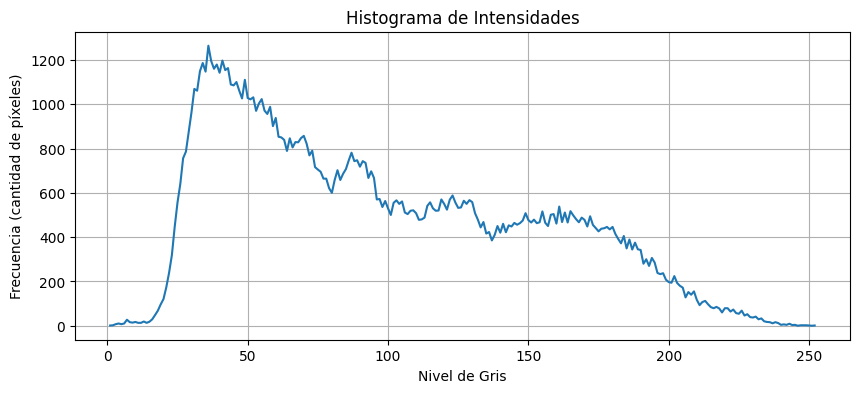

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 5
# --------------------------------------

# 5.1: Calculá el histograma usando scikit-image
hist, bins = ski.exposure.histogram(monedas_gray)

# 5.2: Encontrá el valor de gris más frecuente
# Pista: usá np.argmax() sobre el histograma para encontrar el índice del valor máximo.
valor_mas_frecuente = bins[np.argmax(hist)]
print(f"El nivel de gris más frecuente es: {valor_mas_frecuente}")

# 5.3: Visualizá el histograma con matplotlib
plt.figure(figsize=(10, 4))
plt.plot(bins, hist)
plt.title('Histograma de Intensidades')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia (cantidad de píxeles)')
plt.grid(True)
plt.show()

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 5:")
print("Observando el histograma, ¿qué información te puede ayudar a elegir")
print("un buen valor de umbral para la segmentación del ejercicio anterior?")


Pregunta Conceptual 5:
Observando el histograma, ¿qué información te puede ayudar a elegir
un buen valor de umbral para la segmentación del ejercicio anterior?


Observando el histograma, la información clave para elegir un buen valor de umbral es la presencia de dos picos distintos.

* La mayoría de los histogramas de imágenes con objetos claros sobre un fondo oscuro (o viceversa) muestran una distribución bimodal.

* El primer pico representa la intensidad de los píxeles del fondo.

* El segundo pico representa la intensidad de los píxeles de los objetos.


El mejor umbral se encuentra en el punto más bajo de la zona de separación entre los dos picos.  Esta "zona de valle" representa la transición entre el fondo y los objetos.

Al elegir un umbral en este punto, maximizás la diferencia entre los objetos y el fondo, minimizando la cantidad de píxeles que se clasifican incorrectamente. Si la iluminación fuera perfectamente uniforme, el histograma mostraría estos dos picos muy bien definidos, facilitando la elección. En el caso de la imagen de las monedas, el histograma mostrará un pico para el fondo (oscuro) y otro para las monedas (claras). El umbral ideal estaría en la "separación" entre ambos picos.

###Ejercicio Integrador: Pipeline Completo (10 minutos)

¡Llegó el momento de juntar todo! Vamos a crear una única función que realice un flujo de trabajo completo de procesamiento de imágenes.

Objetivo:

- Creá una función pipeline_procesamiento que reciba la ruta de una imagen y aplique una secuencia de pasos:

- Cargar la imagen.

- Realizar un preprocesamiento (convertir a escala de grises).

- Detectar los bordes.

- Segmentar la imagen original en escala de grises.

- Devolver y mostrar todos los resultados intermedios y finales.

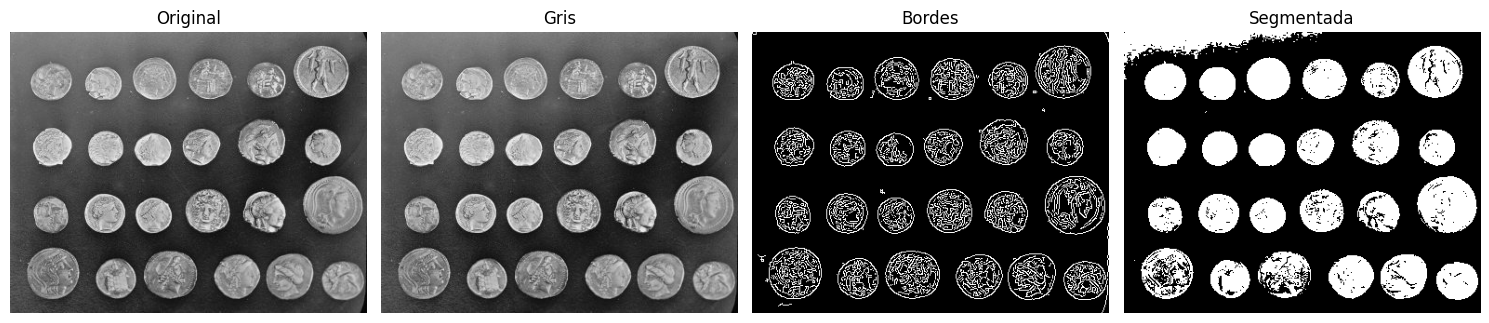

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO INTEGRADOR
def mostrar_imagenes(imagenes, titulos):
    """
    Función de ayuda para mostrar múltiples imágenes.
    """
    num_imagenes = len(imagenes)
    plt.figure(figsize=(15, 5))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(1, num_imagenes, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def pipeline_procesamiento(ruta_imagen, umbral_seg=120, canny_low=50, canny_high=150):
    """
    Pipeline que realiza un procesamiento de imagen de punta a punta.

    Parámetros:
    - ruta_imagen: Path al archivo de la imagen.
    - umbral_seg: Umbral para la segmentación.
    - canny_low, canny_high: Umbrales para el detector Canny.

    Retorna:
    - Un diccionario con las imágenes procesadas en cada paso.
    """
    resultados = {}

    # 1. Cargar la imagen
    imagen_original = cv2.imread(ruta_imagen)
    if imagen_original is None:
        print(f"Error: No se pudo cargar la imagen desde '{ruta_imagen}'.")
        return None
    resultados['Original'] = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB) # Para mostrar en color

    # 2. Convertir a escala de grises
    imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)
    resultados['Gris'] = imagen_gris

    # 3. Aplicar detector de bordes Canny
    bordes_canny = cv2.Canny(imagen_gris, canny_low, canny_high)
    resultados['Bordes'] = bordes_canny

    # 4. Aplicar segmentación por umbral
    _, imagen_segmentada = cv2.threshold(imagen_gris, umbral_seg, 255, cv2.THRESH_BINARY)
    resultados['Segmentada'] = imagen_segmentada

    return resultados

# Probá tu pipeline con una de las imágenes
resultados = pipeline_procesamiento('monedas.jpg')
if resultados:
    mostrar_imagenes(list(resultados.values()), list(resultados.keys()))

###Reflexión y Síntesis (5 minutos)

¡Felicitaciones por completar el laboratorio! Tómate un momento para reflexionar sobre lo que aprendiste.

#### Preguntas de Síntesis:

- ¿Cuáles fueron las principales diferencias que notaste entre usar OpenCV y scikit-image? Por ejemplo, en la forma de llamar a las funciones o en los formatos de imagen que esperan.

1. Formato de color y orden de los canales

OpenCV: Por defecto, utiliza el formato de color BGR (Azul, Verde, Rojo) cuando carga imágenes. Si no tienes esto en cuenta, los colores se verán incorrectos. Para mostrar la imagen con los colores correctos en Matplotlib, debes convertirla a RGB (cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)).

scikit-image: Generalmente trabaja con el formato RGB (Rojo, Verde, Azul), que es el estándar más común y el que Matplotlib espera, haciendo que la visualización sea más sencilla.

2. Rangos de valores de los píxeles

OpenCV: Trabaja con imágenes donde los valores de los píxeles están en el rango de 0 a 255 (entero de 8 bits).

scikit-image: Muchas de sus funciones de procesamiento esperan que los valores de los píxeles estén normalizados en el rango de 0.0 a 1.0 (punto flotante). Esto es importante recordarlo para evitar errores. Por ejemplo, al aplicar Canny, a menudo es necesario normalizar la imagen dividiéndola por 255.0.

3. Conveniencia de las funciones

OpenCV: Sus funciones son extremadamente rápidas y están optimizadas para el rendimiento, lo que lo hace ideal para aplicaciones en tiempo real. A menudo, las funciones de OpenCV devuelven un solo resultado directamente (por ejemplo, cv2.Canny devuelve la imagen con los bordes).

scikit-image: Ofrece una sintaxis más limpia y "orientada a la ciencia". Sus funciones a veces devuelven múltiples valores para mayor conveniencia. Por ejemplo, ski.exposure.histogram devuelve tanto la frecuencia de los píxeles como las ubicaciones de los "contenedores" del histograma (hist y bins). Es una excelente opción para la investigación y el prototipado rápido.

- Pensá en una aplicación real o práctica para cada una de las siguientes técnicas:

`Detección de bordes:` La detección de bordes se utiliza en el control de calidad y la inspección automatizada. Por ejemplo, en una fábrica de componentes electrónicos, un sistema de visión artificial puede usar la detección de bordes para verificar si un chip está correctamente alineado en una placa de circuito impreso. El algoritmo detecta los bordes del chip y los compara con un patrón de referencia. Si los bordes detectados no coinciden con las tolerancias preestablecidas, el sistema puede rechazar automáticamente el producto. Esta aplicación es clave para garantizar la precisión y la calidad de la producción.

`Segmentación por umbral:` ___________________

`Manipulación de canales de color:` ___________________

- Si tuvieras que procesar automáticamente un lote de 1000 imágenes, ¿qué consideraciones adicionales tendrías en cuenta que no fueron cruciales en este laboratorio (por ejemplo, manejo de errores, variabilidad entre imágenes, eficiencia)?

In [ ]:
import os

if os.path.exists('texto.png'):
    print("The file 'texto.png' exists.")
else:
    print("The file 'texto.png' does not exist.")

The file 'texto.png' does not exist.
